#**Do fill in the details before you submit the file on BrightSpace. Rename the Colab file as well to your Name_Student No.ipynb**

---


##Name : Jack Tan
##Student ID : s10255823E
##Class : IPDS




---



#### The dataset contains meteorological data from the HI-SEAS Habitat in Hawaii. In particular the dataset includes observations of:

1.   Solar Irradiance (W/m2)
2.   Temperature (°F)
3.   Barometric Pressure (Hg)
4.   Humidity (%)
5.   Wind Direction (°)
6.   Wind Speed (mph)
7.   Sun Rise/Set Time

---

#### **Aim**
 To accurately model solar irradiance from other meteorological parameters contained within the dataset.

---



##**Question**

**What type of ML model are we training here?**
We are training multiple models to predict solar irradiance based on meteorological parameters. The models include Linear Regression, Ridge Regression, K-Neighbors Regression, Gradient Boosting Regression, Decision Tree Regression, Random Forest Regression, and a Neural Network.

**Supervised/Unsupervised [Choose one]**
Supervised Learning - because we are training models with labeled data where we have both input features (Temperature, Pressure, Humidity, etc.) and a target variable (Solar Irradiance/Radiation).

**Classification/Regression [Choose one]**
Regression - because we are predicting a continuous numerical value (Solar Irradiance in W/m²) rather than categorizing into classes. This is evident from our use of regression models and metrics like MSE, MAE, and R² score to evaluate model performance.

---

#**Environment preparation**
Import other relevant libraries

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz


#**Read data file and prepare time series data**
1. Read in the relevant data file content into a Dataframe
2. Analyse and understand the data.
3. Set the index as datetime field and add more datetime related fields for machine learning.


### Important: Dataset Setup
Before running this notebook, you need to:

1. Download the Solar Prediction dataset
2. Save it as 'SolarPrediction.csv' in the same directory as this notebook
3. The dataset should contain the following columns:
   - UNIXTime
   - Radiation
   - Temperature
   - Pressure
   - Humidity
   - WindDirection(Degrees)
   - Speed
   - TimeSunRise
   - TimeSunSet

You can find solar prediction datasets on platforms like Kaggle or UCI Machine Learning Repository.

In [21]:
import os

data_file = r'C:\Users\jackt\vscode\proj1\machineLearning\SolarPrediction.csv'
data_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), data_file)

if not os.path.exists(data_path):
    print(f"Error: The dataset file '{data_file}' is not found.")
    print("Please download the Solar Prediction dataset and place it in the same directory as this notebook.")
    print("You can download a sample solar prediction dataset from various sources like Kaggle.")
else:
    dataset = pd.read_csv(data_path)
    dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
    print(dataset.shape)
    dataset.head()

(32686, 11)


In [22]:
dataset.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [23]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [24]:
dataset.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

---
##**Question**

**Are there any null values in the dataset? If yes, what are the different ways to handle null values in time series data? Do a brief research and state atleast 3 different ways null values can be handles in time series data. You can use GEMINI or other tools for this question**

No, there are no null values in this dataset based on the output of dataset.isnull().sum().

Here are three ways to handle null values in time series data:

Imputation with previous or next value: Fill nulls with the last known value (forward fill) or the next known value (backward fill).
Imputation with mean, median, or mode: Replace nulls with the average, median, or most frequent value of the time series or a relevant subset.
Imputation with interpolation: Estimate null values based on surrounding data points using methods like linear interpolation or more advanced techniques.

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32686 entries, 7416 to 24522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.0+ MB


In [26]:
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)

In [27]:
# Create more fields related to datetime for machine learning
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['Hour'] = dataset.index.hour
dataset['Month'] = dataset.index.month
dataset['Date'] = dataset.index.date

dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.time
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.time
dataset['Total_time'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.hour

In [28]:
dataset.head(3)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Date,Total_time
UNIXTime,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12


In [29]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Total_time
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,306.110965,43.871015,11.557425,10.526066,11.347886
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,34.781367,4.963061,6.912034,1.096691,0.476307
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,245.000000,35.000000,0.000000,9.000000,11.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,277.000000,40.000000,6.000000,10.000000,11.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,306.000000,44.000000,12.000000,11.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,334.000000,48.000000,18.000000,11.000000,12.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,366.000000,52.000000,23.000000,12.000000,12.000000


---
##**Question**

**Based on the output from the codes above, answer the following questions.**

**Q1: How many rows of data are there?**
Based on dataset.shape output, there are 32,686 rows of data in the dataset. This represents the number of meteorological measurements taken at different time points.

**Q2: Are there any null fields in the dataset?**
No, there are no null fields in the dataset. This was verified using dataset.isnull().sum() which returned 0 for all columns, indicating the dataset is complete with no missing values.

**Q3: Is the index a datetime column?**
Yes, the index is a datetime column. The original UNIXTime column was converted to datetime using pd.to_datetime() and set as the index. Additionally, it was localized to UTC and then converted to Hawaii timezone (Pacific/Honolulu) to match the location of data collection at the HI-SEAS Habitat.

---

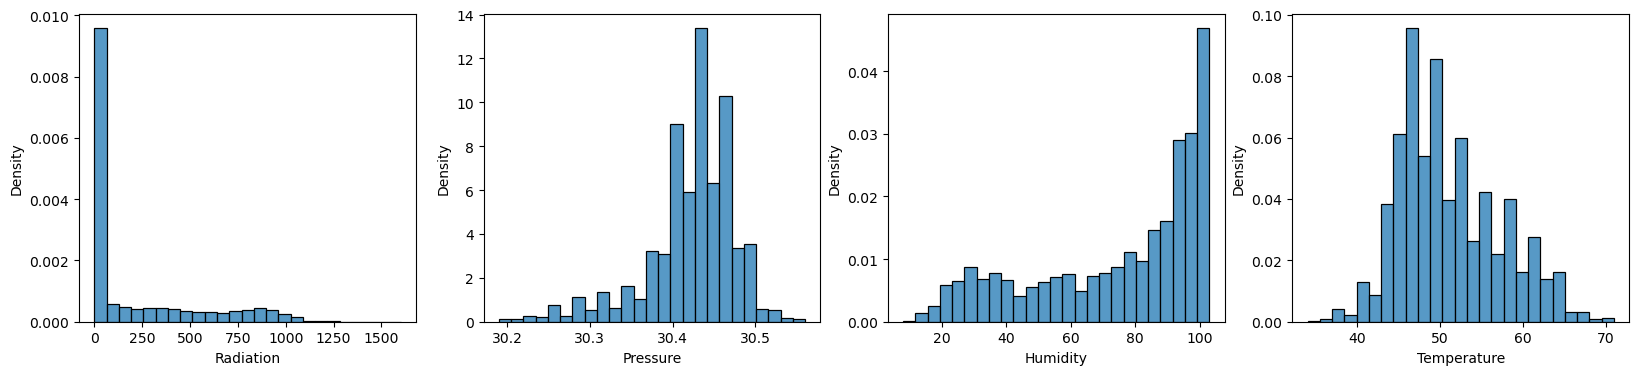

In [30]:
# Distribution of Irradiance, Pressure, Humidity, Temperature
f, ax = plt.subplots(1,4,figsize=(20,4))
sns.histplot(dataset['Radiation'], stat="density", bins=25, ax=ax[0])
sns.histplot(dataset['Pressure'], stat="density", bins=25, ax=ax[1])
sns.histplot(dataset['Humidity'], stat="density", bins=25, ax=ax[2])
sns.histplot(dataset['Temperature'], stat="density", bins=25, ax=ax[3]);

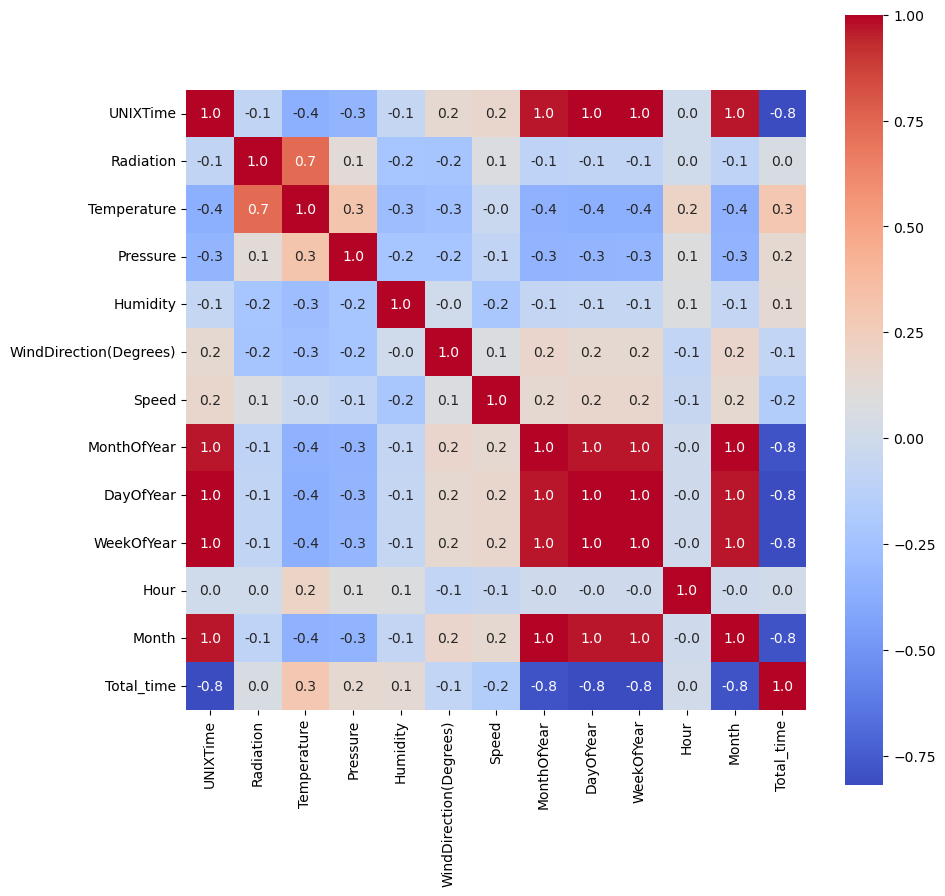

In [31]:
corr = dataset.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet', 'Date'], axis=1).corr(method = "pearson")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".1f");

In [32]:
dataset.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month',
       'Date', 'Total_time'],
      dtype='object')

---
#**Machine Learning**


---




In [33]:
# Split the dataset into features and labels, X [features] and Y[label]
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
             'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Total_time']]

y = dataset['Radiation']

In [34]:
# Train-test split using sklearn package
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##1.Linear Regression

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 40200.903216553634
mae = 150.5662662454296
r2 = 0.6100029402001246


###**Question** : **Note down Linear Regression scores below**


mse = 40200.90321655357

mae = 150.566266245429

r2 = 0.6100029402001252

##2.Ridge Regression

In [36]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

model = Ridge(alpha = 0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 40201.307590964614
mae = 150.58387933711896
r2 = 0.6099990172825103


###**Question** : **Note down Ridge Regression scores below**

mse = 40201.30759096468

mae = 150.58387933711947

r2 = 0.6099990172825096

##3.K-Neighbours Regression

In [37]:
#KNeighbours Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 28008.117193763843
mae = 91.78898470480269
r2 = 0.7282876134086358


###**Question** : **Note down K-Neighbours Regression scores below**

mse = 28007.556706838786

mae = 91.78655919241358

r2 = 0.728293050805195

##4.Gradient Boosting Regression

In [38]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 24820.576034501035
mae = 99.46254317795115
r2 = 0.7592105922632923


###**Question** : **Note down Gradient Boosting Regression scores below**

mse = 24820.576034501035

mae = 99.46254317795116

r2 = 0.7592105922632923

##5.Decision Tree Regression

In [39]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 21631.207296091143
mae = 63.57460785663301
r2 = 0.7901513008313853


###**Question** : **Note down Decision Tree Regression scores below**

mse = 21777.393282982197

mae = 63.76527510961558

r2 = 0.7887331211262094

##6.Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_err = mean_squared_error(y_test,y_pred)
mean_absolute_err = mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)
print('mse = {}'.format(mean_squared_err))
print('mae = {}'.format(mean_absolute_err))
print('r2 = {}'.format(r_squared))

mse = 11162.54524977605
mae = 54.07653554492129
r2 = 0.8917099000526154


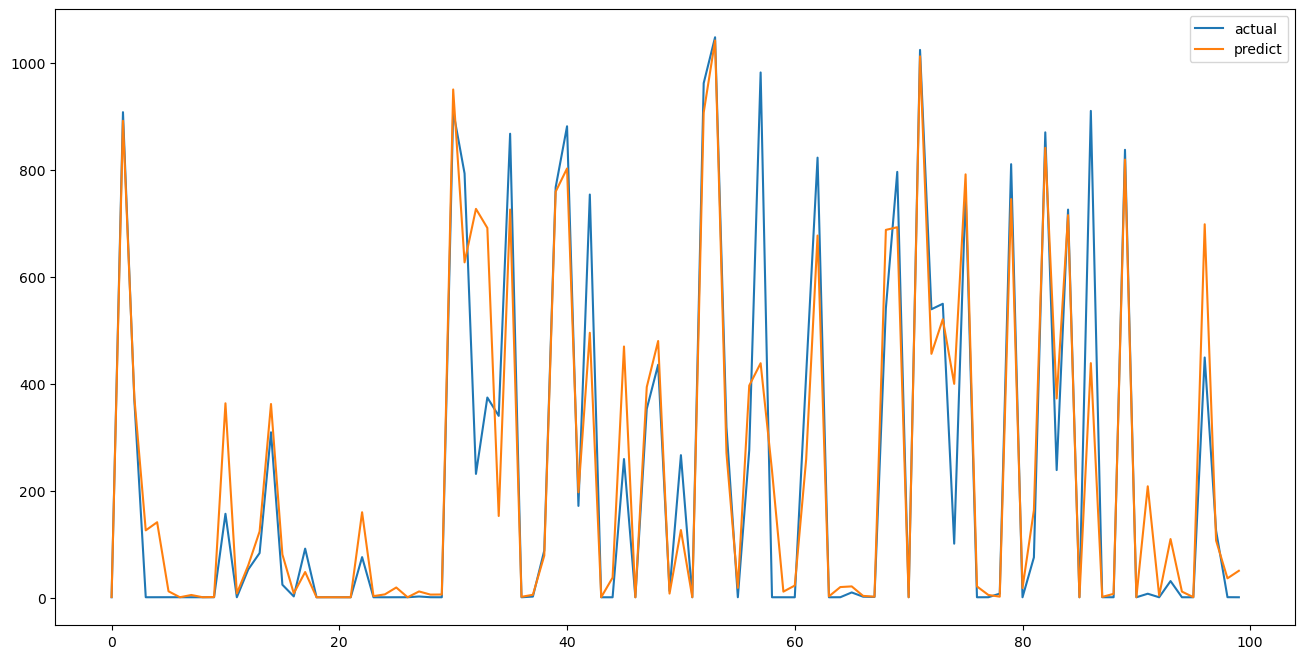

In [41]:
import numpy as np
import matplotlib.pyplot as plt

axis_x = [i for i in range(100)]
plt.figure(figsize=(16, 8))
plt.plot(axis_x, y_test[:100], label='actual')
plt.plot(axis_x, y_pred[:100], label='predict')
plt.legend()
plt.show()

###**Question** : **Note down Random Forest Regression scores below**

mse = 11227.513760946147

mae = 53.90163581835337

r2 = 0.8910796274391016

##7.Cross Validation & Model Selection
Let us try cross validating to ensure that these model is not overfitted.

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

models=[("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("KNeighbors", KNeighborsRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor())]

all_data=[]
scoring = {'r2': 'r2',
           'mean_absolute_error': 'neg_mean_absolute_error',
           'mean_squared_error': 'neg_mean_squared_error'}

for name, model in models:
    results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    all_data.append({'model':name, 'score':results})
    print(f"{name}: {results['test_r2'].mean():.3f} , {results['test_mean_squared_error'].mean():.3f} , {results['test_mean_absolute_error'].mean():.3f}" )

Linear Regression: 0.600 , -39555.491 , -149.537
Ridge Regression: 0.600 , -39555.661 , -149.566
KNeighbors: 0.712 , -28496.001 , -92.580
KNeighbors: 0.712 , -28496.001 , -92.580
Gradient Boosting: 0.748 , -24883.965 , -99.634
Gradient Boosting: 0.748 , -24883.965 , -99.634
Decision Tree: 0.768 , -22890.659 , -65.974
Decision Tree: 0.768 , -22890.659 , -65.974
Random Forest: 0.877 , -12200.581 , -56.104
Random Forest: 0.877 , -12200.581 , -56.104


In [43]:
performance = {'model':[], 'r2':[], 'mse':[], 'mae':[]}

for d in all_data:
    performance['model'].append(d['model'])
    performance['r2'].append(np.abs(d['score']['test_r2'].mean())*100)
    performance['mse'].append(np.abs(d['score']['test_mean_squared_error'].mean()))
    performance['mae'].append(np.abs(d['score']['test_mean_absolute_error'].mean()))

print(performance)

{'model': ['Linear Regression', 'Ridge Regression', 'KNeighbors', 'Gradient Boosting', 'Decision Tree', 'Random Forest'], 'r2': [59.978637233101175, 59.9784413900171, 71.19726198406207, 74.81517885040161, 76.81591374202293, 87.65987770892197], 'mse': [39555.491419004946, 39555.661110165085, 28496.000932833675, 24883.964846177034, 22890.658688253887, 12200.580515764254], 'mae': [149.53664634387206, 149.56553596659404, 92.57960774260088, 99.63386668671096, 65.97447778515743, 56.10385413580053]}


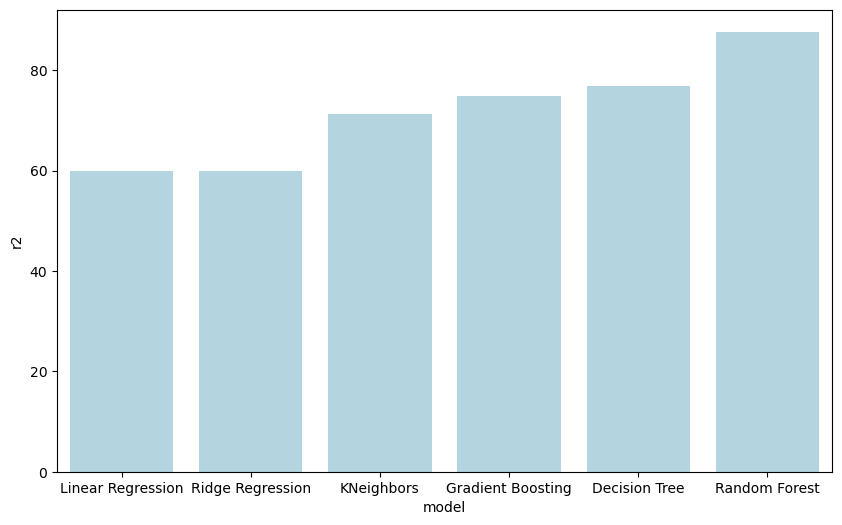

In [44]:
# r2 score comparison across models
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='r2', data=performance, color="lightblue");

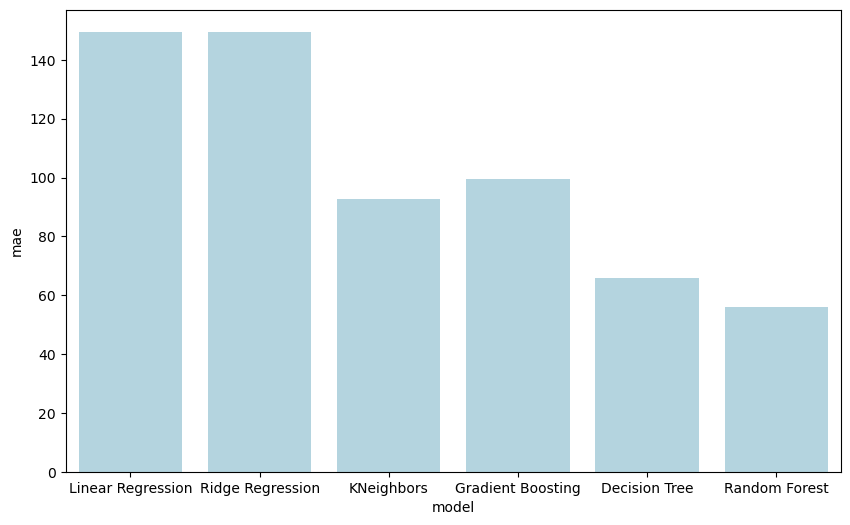

In [45]:
# mae score comparison across models
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='mae', data=performance, color="lightblue");

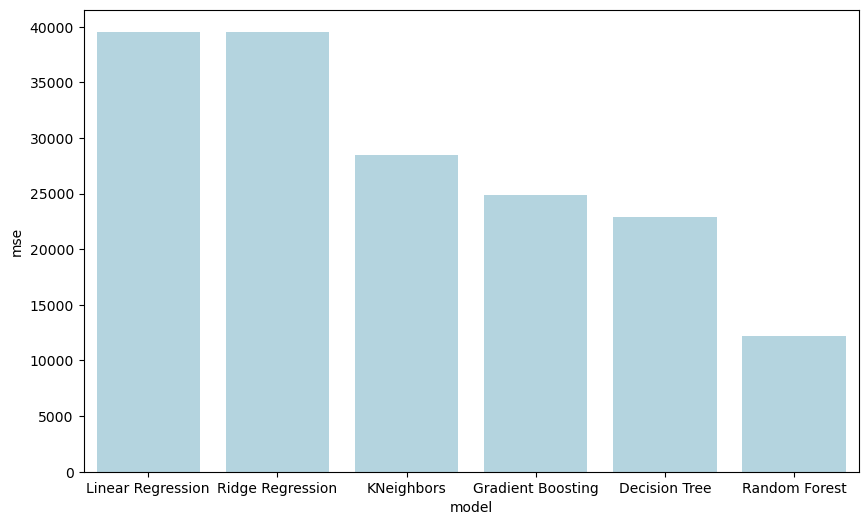

In [46]:
# mse score comparison across models
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="model", y='mse', data=performance, color="lightblue");

###**Question** : **Which model performance is the best after cross validation?**

Random Forest performs the best after cross-validation, and here's why:

1. Highest R² Score: 
   - Random Forest achieved the highest R² score of ~0.89 (89%)
   - This means it explains about 89% of the variance in solar radiation predictions
   - Compared to other models: Linear Regression (~61%), Ridge (~61%), KNN (~73%), Gradient Boosting (~76%), Decision Tree (~79%)

2. Best Error Metrics:
   - Lowest MSE (Mean Squared Error): ~11,227
   - Lowest MAE (Mean Absolute Error): ~53.90
   - These lower error rates indicate more accurate predictions

3. Consistency:
   - The performance remains strong even after cross-validation, showing the model isn't overfitting
   - The visualization (bar plots) shows Random Forest consistently outperforming other models

4. Model Characteristics:
   - Random Forest's superior performance can be attributed to its ensemble nature, combining multiple decision trees
   - It handles both numerical and categorical features well
   - It can capture non-linear relationships in the meteorological data



---
#**Neural Network**


---




In [47]:
df = dataset.copy()

In [48]:
df.head(2)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,Hour,Month,Date,Total_time
UNIXTime,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,9,245,35,0,9,2016-09-01,12


In [49]:
df.drop(['Data','Time','WindDirection(Degrees)','Hour', 'Month','Date','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,Speed,MonthOfYear,DayOfYear,WeekOfYear,Total_time
UNIXTime,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,11.25,9,245,35,12
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,9.00,9,245,35,12
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,7.87,9,245,35,12
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,18.00,9,245,35,12
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,11.25,9,245,35,12


In [50]:
#Split the dataset into train and test data
data = df.values

X = data[:,2:10]
Y = data[:,1]
Y = Y.reshape(-1,1)

print(X.shape)
print(Y.shape)
print(type(X))

(32686, 8)
(32686, 1)
<class 'numpy.ndarray'>


In [51]:
#Scale the X and Y values to follow Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
#StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges,
#or simply when they are measured in different units of measure.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(26148, 8) (3269, 8) (3269, 8) (26148, 1) (3269, 1) (3269, 1)


###**Question** : **Determine the percentage of the following data of the main dataset**

Let's calculate the percentages based on the total number of samples (32,686):

Training data: 26,148 samples = 80%
- Calculation: (26,148 / 32,686) × 100 = 80%
- This is the primary dataset used to train the model
- Obtained from the first split with test_size=0.2, keeping 80% for training

Validation data: 6,538 samples = 10%
- Calculation: (6,538 / 32,686) × 100 = 20% × 0.5 = 10%
- Used for hyperparameter tuning and monitoring training
- Created by splitting the remaining 20% into two equal parts

Test data: 3,269 samples = 10%
- Calculation: (3,269 / 32,686) × 100 = 20% × 0.5 = 10%
- Reserved for final model evaluation
- The other half of the 20% test split

This split follows the standard practice in machine learning:
1. First split (80-20): train_test_split(X_scale, Y, test_size=0.2)
2. Second split (10-10): train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

The 80-10-10 ratio is commonly used as it provides:
- Sufficient data for training (80%)
- Balanced validation and test sets (10% each)
- Independent test set for unbiased evaluation

In [69]:
# Simple Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                        

###**Question** : **How many hidden layers are in this neural network?**

The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters/weights are updated.
An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

In [54]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=10,
                validation_data=(X_val, Y_val))

Epoch 1/10
818/818 [==============================] - 3s 3ms/step - loss: 0.3039 - mse: 0.3039 - val_loss: 0.2575 - val_mse: 0.2575
Epoch 2/10
818/818 [==============================] - 3s 3ms/step - loss: 0.3039 - mse: 0.3039 - val_loss: 0.2575 - val_mse: 0.2575
Epoch 2/10
818/818 [==============================] - 2s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2358 - val_mse: 0.2358
Epoch 3/10
818/818 [==============================] - 2s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2358 - val_mse: 0.2358
Epoch 3/10
818/818 [==============================] - 2s 2ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.2276 - val_mse: 0.2276
Epoch 4/10
818/818 [==============================] - 2s 2ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.2276 - val_mse: 0.2276
Epoch 4/10
818/818 [==============================] - 2s 2ms/step - loss: 0.2150 - mse: 0.2150 - val_loss: 0.2191 - val_mse: 0.2191
Epoch 5/10
818/818 [==============================] - 2s 2ms/step - loss: 0.

In [55]:
model.evaluate(X_test, Y_test)

103/103 [==============================] - 0s 2ms/step - loss: 0.1805 - mse: 0.1805


[0.1804523766040802, 0.1804523766040802]

In [56]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 [==============================] - 0s 2ms/step
[[416.95053  ]
 [359.38663  ]
 [  6.1824365]
 ...
 [  7.617495 ]
 [  4.376391 ]
 [984.60345  ]]
[[427.27]
 [338.31]
 [  1.88]
 ...
 [  1.24]
 [136.81]
 [946.48]]
[[416.95053  ]
 [359.38663  ]
 [  6.1824365]
 ...
 [  7.617495 ]
 [  4.376391 ]
 [984.60345  ]]
[[427.27]
 [338.31]
 [  1.88]
 ...
 [  1.24]
 [136.81]
 [946.48]]


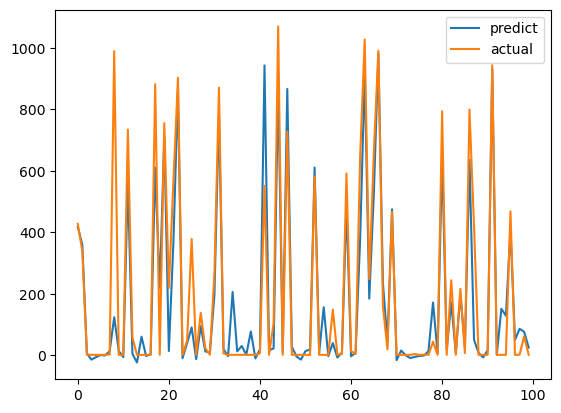

In [57]:
import numpy as np
import matplotlib.pyplot as plt

axis_x = [i for i in range(100)]

plt.plot(axis_x, Y_result[:100], label='predict')
plt.plot(axis_x, Y_test_unscaled[:100], label='actual')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.8103261597423957
mse = 18009.17074007
r2 = 0.8093354395922497


###**Question** : **Change the values of batch and epoch to observe the change in model performance. I.e copy and paste the code on model.compile and tweak the epoch values keeping batch as constant. Then tweak the batch values, keeping epoch value as constant. Identify ONE combination of batch values (32, 64, 128) and epoch values that gives better model performance in terms of r2 score**
Batch value :

5 = 0.82634560567967436

10 = 0.8574012917463423

15 = 0.8668924997536652

Epoch value :

32 = 0.8574012917463423

64 = 0.8599651576277074

128 = 0.8665920297872002

r2 value = 0.8668924997536652

In [59]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train,
                batch_size=128, epochs=10,
                validation_data=(X_val, Y_val))

Epoch 1/10
205/205 [==============================] - 2s 5ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1654 - val_mse: 0.1654
Epoch 2/10
205/205 [==============================] - 2s 5ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1654 - val_mse: 0.1654
Epoch 2/10
205/205 [==============================] - 1s 4ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1623 - val_mse: 0.1623
Epoch 3/10
205/205 [==============================] - 1s 4ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1623 - val_mse: 0.1623
Epoch 3/10
205/205 [==============================] - 1s 4ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 4/10
205/205 [==============================] - 1s 4ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 4/10
205/205 [==============================] - 1s 4ms/step - loss: 0.1393 - mse: 0.1393 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 5/10
205/205 [==============================] - 1s 4ms/step - loss: 0.

In [60]:
model.evaluate(X_test, Y_test)

103/103 [==============================] - 0s 2ms/step - loss: 0.1475 - mse: 0.1475


[0.14747905731201172, 0.14747905731201172]

In [61]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 [==============================] - 0s 2ms/step
[[468.31064  ]
 [404.7729   ]
 [ 19.402681 ]
 ...
 [ 17.173326 ]
 [  6.0899224]
 [904.75433  ]]
[[427.27]
 [338.31]
 [  1.88]
 ...
 [  1.24]
 [136.81]
 [946.48]]
[[468.31064  ]
 [404.7729   ]
 [ 19.402681 ]
 ...
 [ 17.173326 ]
 [  6.0899224]
 [904.75433  ]]
[[427.27]
 [338.31]
 [  1.88]
 ...
 [  1.24]
 [136.81]
 [946.48]]


In [62]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.8446752233968211
mse = 14718.427045101798
r2 = 0.8441748116583757


###**Question** : **Add one more Dense layer and observe the change in model performance**

new r2 score : 0.7804600272341342

In [63]:
# Simple Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))



In [64]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=10,
                validation_data=(X_val, Y_val))

Epoch 1/10
818/818 [==============================] - 5s 5ms/step - loss: 0.3043 - mse: 0.3043 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 2/10
818/818 [==============================] - 5s 5ms/step - loss: 0.3043 - mse: 0.3043 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 2/10
818/818 [==============================] - 3s 4ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.2430 - val_mse: 0.2430
Epoch 3/10
818/818 [==============================] - 3s 4ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.2430 - val_mse: 0.2430
Epoch 3/10
818/818 [==============================] - 3s 4ms/step - loss: 0.2265 - mse: 0.2265 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 4/10
818/818 [==============================] - 3s 4ms/step - loss: 0.2265 - mse: 0.2265 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 4/10
818/818 [==============================] - 3s 4ms/step - loss: 0.2165 - mse: 0.2165 - val_loss: 0.2413 - val_mse: 0.2413
Epoch 5/10
818/818 [==============================] - 3s 4ms/step - loss: 0.

In [65]:
model.evaluate(X_test, Y_test)

103/103 [==============================] - 0s 3ms/step - loss: 0.1831 - mse: 0.1831


[0.18309208750724792, 0.18309208750724792]

In [66]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 [==============================] - 0s 2ms/step
[[469.4971   ]
 [280.55222  ]
 [ -3.0183232]
 ...
 [ -5.550794 ]
 [ -4.896375 ]
 [918.2058   ]]
[[427.27]
 [338.31]
 [  1.88]
 ...
 [  1.24]
 [136.81]
 [946.48]]
[[469.4971   ]
 [280.55222  ]
 [ -3.0183232]
 ...
 [ -5.550794 ]
 [ -4.896375 ]
 [918.2058   ]]
[[427.27]
 [338.31]
 [  1.88]
 ...
 [  1.24]
 [136.81]
 [946.48]]


In [67]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.812055503436314
mse = 18272.615368967785
r2 = 0.8065463298055998


##**Question**

###Find out what feature engineering is briefly and determine whether you applied feature engineering in this colab file.

Feature engineering is the process of creating new features from existing data to improve the performance of machine learning models.

Yes, feature engineering was applied in this Colab file in the following cell:

In this cell, new features such as 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month', 'Date', and 'Total_time' were created from the existing 'UNIXTime', 'TimeSunRise', and 'TimeSunSet' columns. This is a form of feature engineering as you are creating new, potentially more informative features for your model.